<a href="https://colab.research.google.com/github/ValentinoMalakianno/PCVK_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Nama : Valentino Malakianno**
### **Kelas : 3G**
### **NIM : 2141720099**

#### **PRAKTIKUM**

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukan nilai keceharan: 50


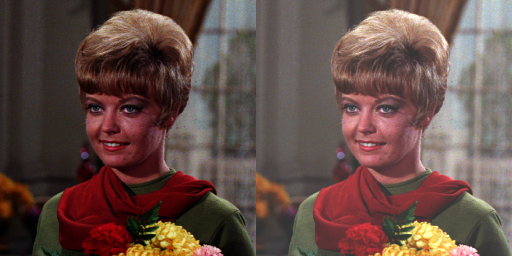

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukan nilai keceharan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


#### **TUGAS PRAKTIKUM**

#####1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori,

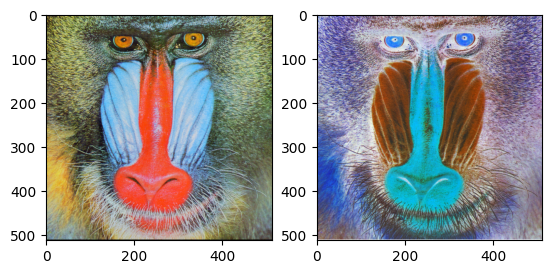

In [3]:
img = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/mandrill.tiff')
img_asli = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_inverse = 255 - img_asli

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_asli)
ax[1].imshow(img_inverse)

#####2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras.

 Mengubah kontras dan tingkat kecerahan 
----------------------------------------
Masukan nilai keceharan [-255  -  255]: 50
Masukkan kontras [1.0  -  3.0]: 2


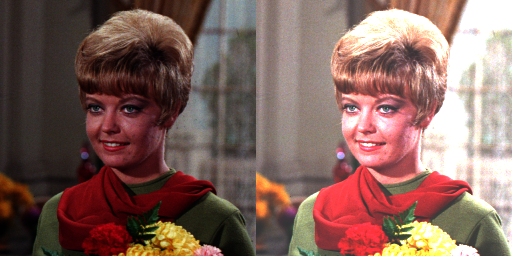

In [4]:
print(' Mengubah kontras dan tingkat kecerahan ')
print('----------------------------------------')

try:
  brightness = int(input('Masukan nilai keceharan [-255  -  255]: '))
  contrast = float(input('Masukkan kontras [1.0  -  3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)


for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

#####3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log.

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukan nilai keceharan : 50


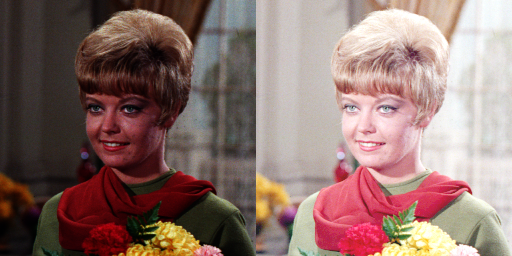

In [5]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
  brightness = int(input('Masukan nilai keceharan : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness *(np.log(1 + original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

#####4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori.

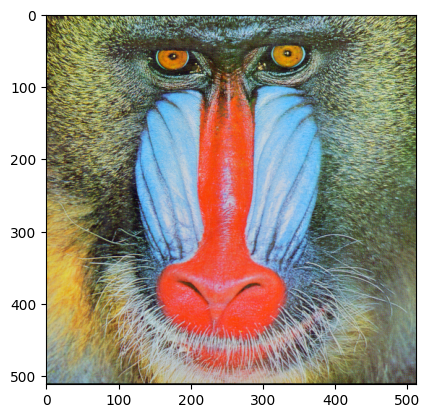

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/mandrill.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

##### AVERAGING

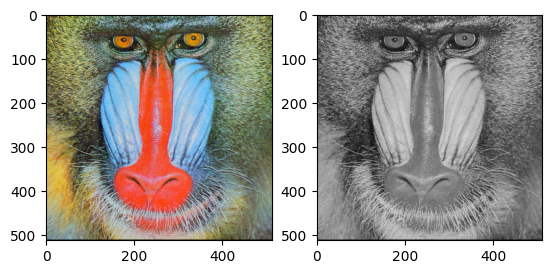

In [7]:
img_avg = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)

ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

#####LIGHTNESS

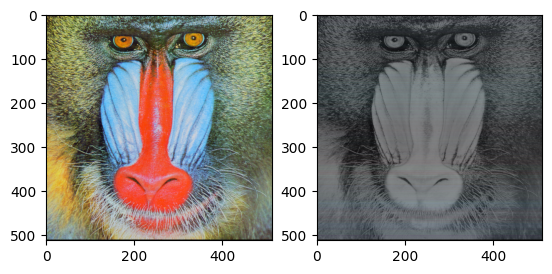

In [8]:
img_light = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/mandrill.tiff')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

#####LUMINANCE

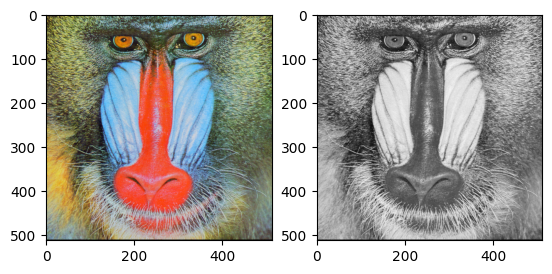

In [9]:
img_lum = cv.imread('/content/drive/MyDrive/PCVK_2023/Images/mandrill.tiff')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

#####5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale

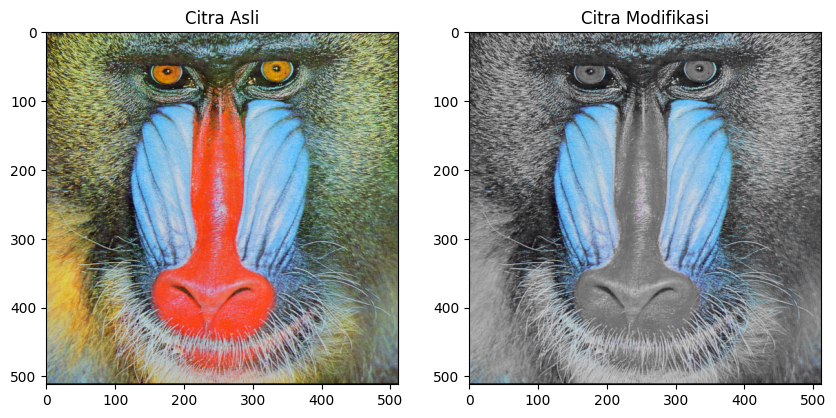

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/PCVK_2023/Images/mandrill.tiff')
result_image = image.copy()

# Koordinat sudut kiri atas dan kanan bawah dari area yang akan dikecualikan dari grayscale
x1, y1 = 570, 90 # Koordinat sudut kiri atas
x2, y2 = 767, 320 # Koordinat sudut kanan bawah


for y in range(image.shape[0]):
    for x in range(image.shape[1]):

        if image[y, x, 0] > image[y, x, 1] and image[y, x, 0] > image[y, x, 2]:

            result_image[y, x] = image[y, x]
        else:

            gray_value = np.mean(image[y, x])
            result_image[y, x] = [gray_value, gray_value, gray_value]

# Tampilkan citra hasil dengan menggunakan matplotlib

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.title('Citra Modifikasi')
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.show()